![](pics/asteroids-header.jpg)
# PyGame: Asteriods

Here we are going to start building the classic game asteriods.

![](pics/arcade-screenshot.jpg)

> **REMEMBER:** When you are programming, google can help you a lot. When you need help with something in pygame, just google `pygame something_you_need` and you should be able to find it.

## Projects

- Project 1:
    - learn how to work with `pygame` and play sounds, print strings and handle key presses
- Project 2:
    - learn how to create an `Asteroid` that moves around the screen
- Project 3:
    - learn how to create a `Player` spaceship that can move around the screen and fire a `Bullet`
- Project 4:
    - learn now to detect collisions between the `Player`, `Asteroid` and `Bullet` objects

## References

- Classic Gamming:[Asteroids](http://www.classicgaming.cc/classics/asteroids/)
- [PyGame and Physics](https://www.petercollingridge.co.uk/tutorials/pygame-physics-simulation/) tutorials

In [15]:
import pygame
from matplotlib import pyplot as plt
import numpy as np

## Create a Window

This will create a simple window with a white background and run until you close the window. When close the window, the variable `running` becomes `False` and the loop exits, which then exits the program.

```python
import pygame

# initialize pygame, this should be called before
# other pygame functions
pygame.init()

background_color = (255,255,255) # white
background_color = "white" # same as above
(width, height) = (300, 200)

# create a blank window
screen = pygame.display.set_mode((width, height))
screen.fill(background_color)

pygame.display.set_caption("Hello")
pygame.display.flip()

running = True
while running:
  for event in pygame.event.get():
    if event.type == pygame.QUIT:
      running = False
```

> You **cannot** run `pygame` inside a Jupyter notebook. You **must** run this stuff from the CLI like we talked about earlier.

## Game Loop

When you play a game, it flows a common flow:

![](pics/game-loop.webp)

- Game Setup: this is where you create the player, the world the player will play in, load sound files, etc
- Handle player input: For this game, it will be keyboard presses, but could also be joystick inputs too
- Update game objects: this is everything you need to update each frame (when the game is rendered to the scren) such as player movements, non-player movements, anything in the world, etc
- Draw to the screen: also known as *rendering*, takes the updated game objects (player, asteroids, bullets, etc) and draws them in their updated locations
- Clean up game: when the game is over, unload anything in memory that was loaded in the Game Setup phase. For this game, there really isn't anything to this

## Text

```python
import pygame

name = "kevin"
font = pygame.font.SysFont("Monaco",20)
text_surface = font.render(
    f"hello ... {name}",
    True,   # anti-alias
    "white" # text color
)
text_rect = text_surface.get_rect()
text_rect.center = rect.center
surface.blit(text_surface, text_rect)
```

## Sounds

```python
import pygame
import os

# setup sound BEFORE initializing pygame
pygame.mixer.pre_init(44100, -16, 1, 512)
pygame.init()
```

Now you need to load a sound file (like `wav`, `ogg`, `mp3`, etc) and play the sound like this:

```python
fire_sound = pygame.mixer.Sound(os.path.join("Sounds", "fire.wav"))
fire_sound.play()
```

In [50]:
help(pygame.mixer.pre_init)

Help on built-in function pre_init in module pygame.mixer:

pre_init(...)
    pre_init(frequency=44100, size=-16, channels=2, buffer=512, devicename=None, allowedchanges=AUDIO_ALLOW_FREQUENCY_CHANGE | AUDIO_ALLOW_CHANNELS_CHANGE) -> None
    preset the mixer init arguments



Now looking at the above `help` for `pre_init`:

- `frequency`: 44100 Hz or 44.1kHZ is typical for music or audio content
- `size`: 16bit audio is also common
- `channel`: 2 channels (stereo) is common, but we are using old single channel mono to make it sound more like the 1980's
- `buffer`: buffer is just how much audio to store and helps playback. The larger this number, the more computer memory is used to store audio. All of the sounds used in the game are really small, so this isn't a big deal

## Events

`pygame` uses a event system for various things.  We will check for events that are keyboard presses and use a timed callback to a user event to create random asteroids. There is more information about `pygame.event` [here](https://www.pygame.org/docs/ref/event.html) on the documentation website.

## Key Presses

Google `pygame keys` and you should see a link for `pygame.key` which has the name for every key:

```
pygame
Constant      ASCII   Description
---------------------------------
K_BACKSPACE   \b      backspace
K_TAB         \t      tab
K_CLEAR               clear
K_RETURN      \r      return
K_PAUSE               pause
K_ESCAPE      ^[      escape
K_SPACE               space
K_EXCLAIM     !       exclaim
...
```

When you check for key presses, you do something like this:

```python
if event.type == pygame.KEYDOWN:
    if event.key == pygame.K_s: # player pressed 's' key
        # do somthing
    elif event.key == pygame.K_q: # player pressed 'q' key
        # do something
    ...
elif event.type == pygame.KEYUP:
    ...
```



## User Events

In [52]:
import pygame

print(f"pygame.USEREVENT: {type(pygame.USEREVENT)} {pygame.USEREVENT}")

pygame.USEREVENT: <class 'int'> 32866


## `pygame.Rect`

Rectagles are used a lot for a variety of things in a game. We are mainly going to use them to keep track of the screen but you could do more.

In [44]:
print(pygame.Rect.__doc__)

Rect(left, top, width, height) -> Rect
Rect((left, top), (width, height)) -> Rect
Rect(object) -> Rect
pygame object for storing rectangular coordinates


In [47]:
r = pygame.Rect(0,0,10,20)
print(r)
print(f"rect: {r.x} {r.y} {r.w} {r.height}")
print(f"center: {r.center}  type: {type(r.center)}")
print(f"size: {r.size}")

<rect(0, 0, 10, 20)>
rect: 0 0 10 20
center: (5, 10)  type: <class 'tuple'>
size: (10, 20)


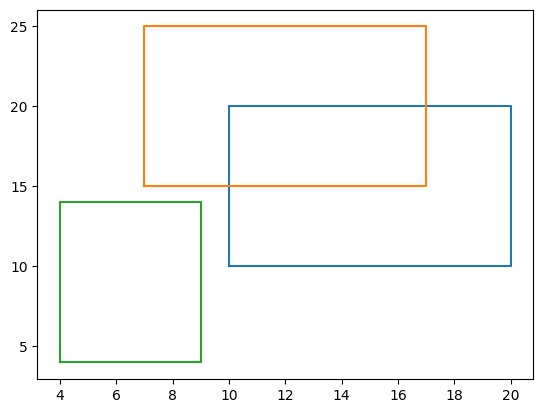

In [31]:
def draw(rects):
    for r in rects:
        pts = np.array([
            (r.x,r.y),
            (r.x+r.w,r.y),
            (r.x+r.w,r.y+r.h),
            (r.x,r.y+r.h),
            (r.x,r.y),
        ])
        plt.plot(pts[:,0], pts[:,1])

world = [
    pygame.Rect(10,10,10,10),
    pygame.Rect(7.5,15,10,10),
    pygame.Rect(4,4,5,10),
]
draw(world)

In [40]:
for r in world:
    hit = r.collidelistall(world)
    if hit:
        print(hit)

[0, 1]
[0, 1]
[2]


In [32]:
help(r.collidelistall)

Help on built-in function collidelistall:

collidelistall(...) method of pygame.rect.Rect instance
    collidelistall(list) -> indices
    test if all rectangles in a list intersect



In [36]:
help(r.collideobjectsall)

Help on built-in function collideobjectsall:

collideobjectsall(...) method of pygame.rect.Rect instance
    collideobjectsall(rect_list) -> objects
    collideobjectsall(obj_list, key=func) -> objects
    test if all objects in a list intersect

